# Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importação de dados


In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/gabrielramos731/Data-science-projects/main/Air%20Line%20Satisfaction%20Prediction/data/train.csv')

In [ ]:
df = df_raw.copy()
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
df['Type of Travel'] = df['Type of Travel'].str.replace('Business travel','Work travel')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Work travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Work travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Work travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Work travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Documentação dos dados
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Análise de dados univariável

In [ ]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
var_cat = []
var_num = []
for i,j in zip(df.columns, df.dtypes):
  if j == 'object':
    var_cat.append(i)
  else:
    var_num.append(i)

## Valures duplicados

In [ ]:
df.duplicated().sum()

0

## Valunos nulos


In [ ]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
df = df.dropna()

## Box-plots

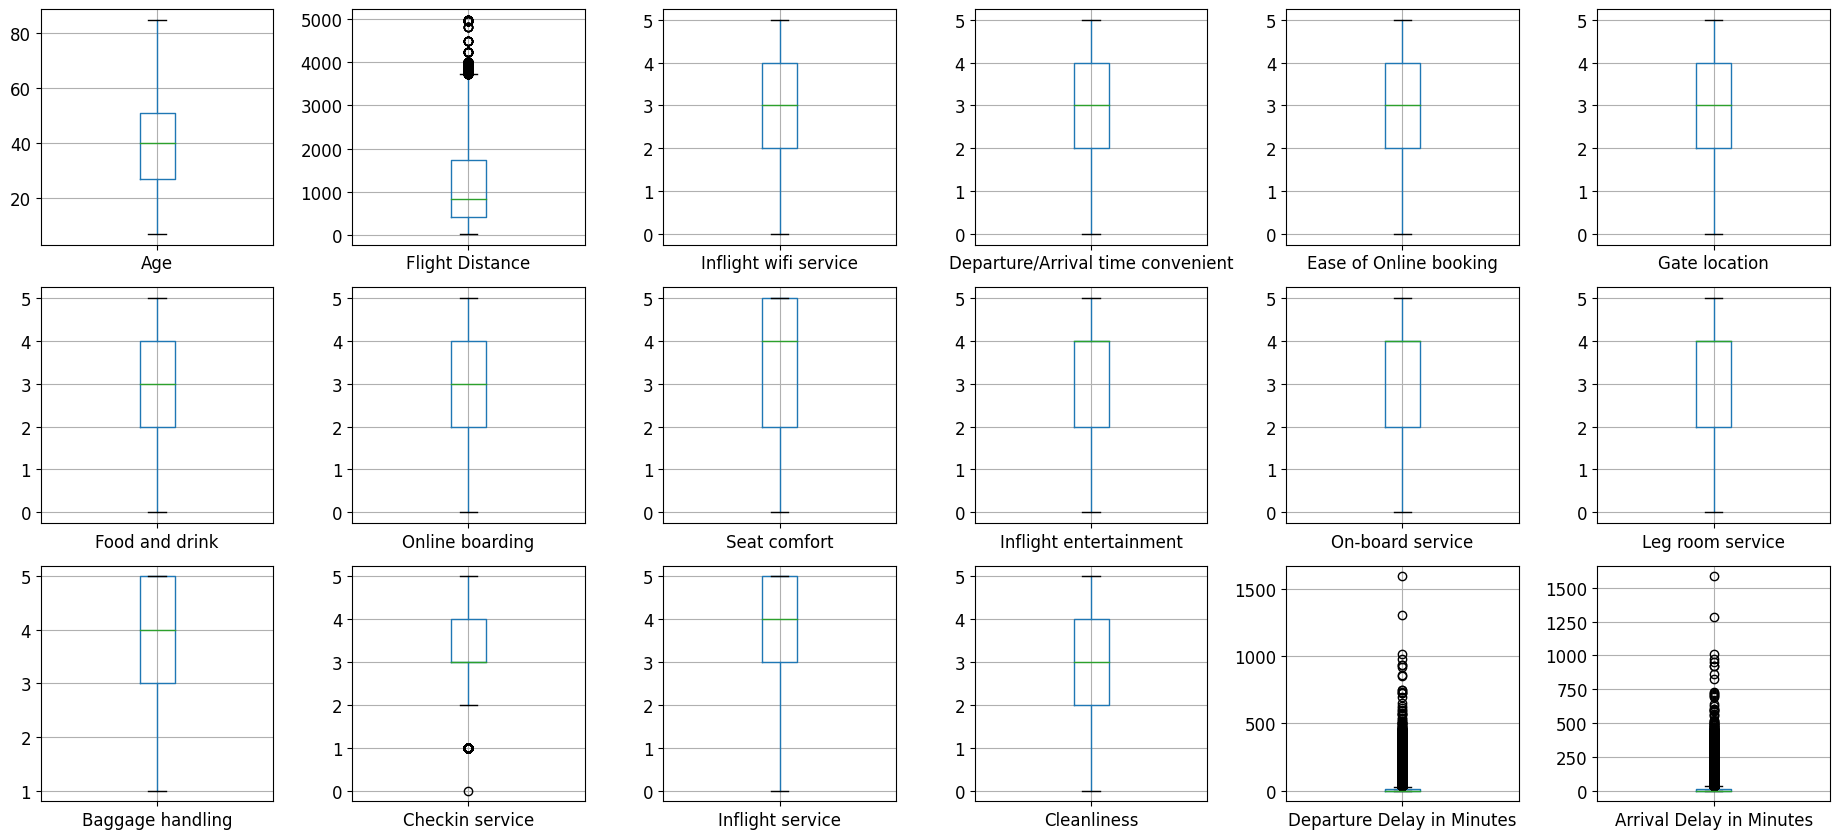

In [ ]:

fig, axes = plt.subplots(3, 6)

for i, el in enumerate(var_num):
  a = df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 8.5)
plt.tight_layout()
plt.show()

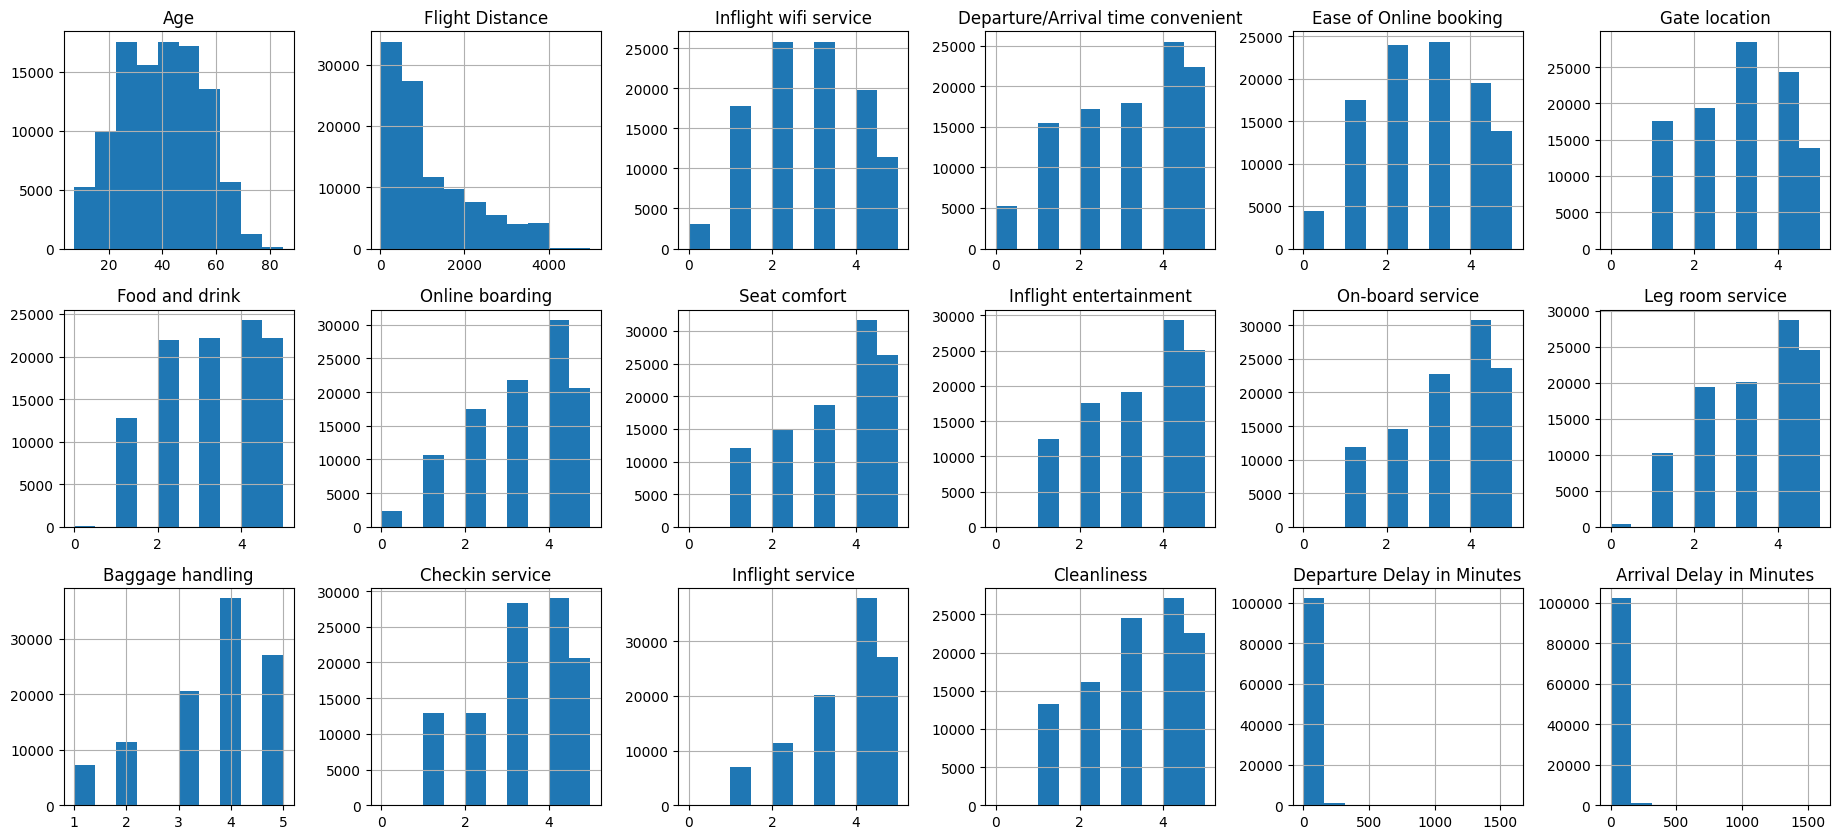

In [ ]:
fig, axes = plt.subplots(3, 6)

for i, el in enumerate(var_num):
  a = df.hist(el, ax=axes.flatten()[i])

fig.set_size_inches(18.5, 8.5)
plt.tight_layout()
plt.show()

## Gráficos de contagem

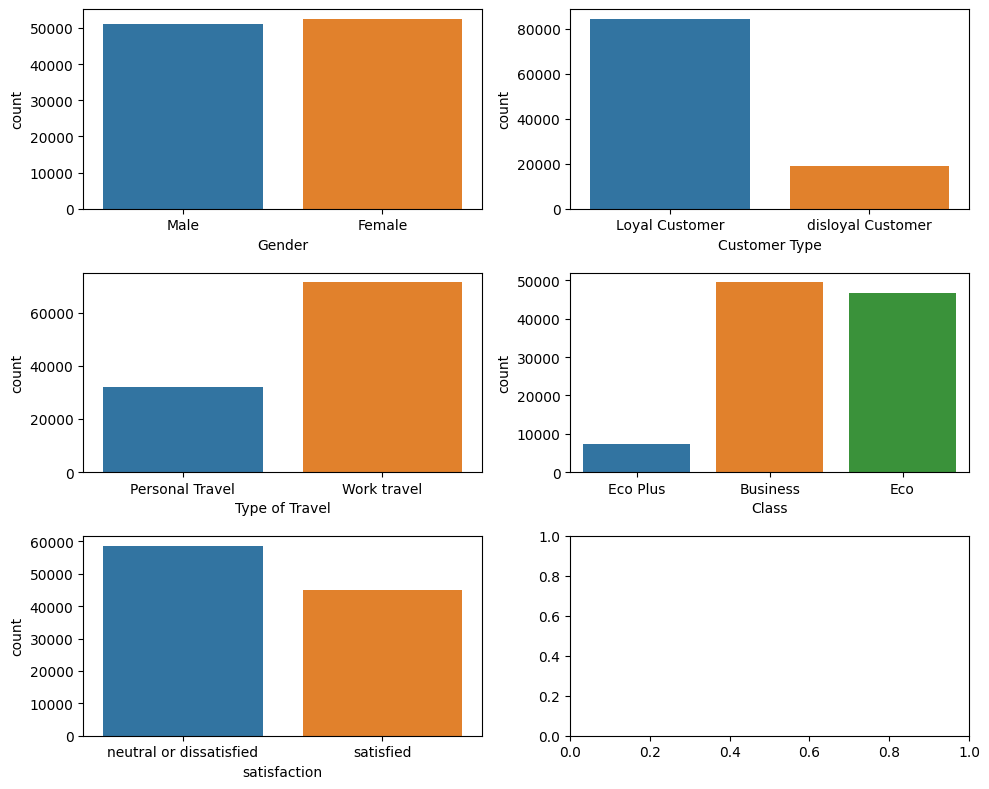

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(10, 8))

for i, el in enumerate(var_cat):
  sns.countplot(x=df[el], ax=axes.flatten()[i])

  plt.tight_layout()

# Hipótesis

1.  O quão a classe influencia na satisfação do cliente

2. Qual tipo de viagem impacta mais na satisfação

3. O atraso é a variável de maior impacto na satisfação (primeiro modelo)?

# Análise de dados bivariável

## Influência da classe na satisfação

In [ ]:
df_grp = df.groupby('Class')['satisfaction'].value_counts().to_frame()

ls = []
for x in df['Class'].value_counts().values:
  ls.append(x)
  ls.append(x)

df_grp['proporcao'] = df_grp['satisfaction'] / ls * 100
df_grp.sort_index(ascending=False, inplace=True)
df_grp

satisfaction  proporcao
Class    satisfaction                                    
Eco Plus satisfied                        1836  24.584896
         neutral or dissatisfied          5632  75.415104
Eco      satisfied                        8671  18.610092
         neutral or dissatisfied         37922  81.389908
Business satisfied                       34390  69.428462
         neutral or dissatisfied         15143  30.571538

## Tipo de viagem e impacto na satisfação

In [ ]:
df_grp = df.groupby('Type of Travel')['satisfaction'].value_counts().to_frame()

ls = []
for x in df.groupby('Type of Travel')['Type of Travel'].value_counts().values:
  ls.append(x)
  ls.append(x)

df_grp['proporcao'] = df_grp['satisfaction'] / ls *100
df_grp.sort_index(ascending=False, inplace=True)
df_grp

satisfaction  proporcao
Type of Travel  satisfaction                                    
Work travel     satisfied                       41634  58.257888
                neutral or dissatisfied         29831  41.742112
Personal Travel satisfied                        3263  10.155934
                neutral or dissatisfied         28866  89.844066

**A justificativa para diferença tão grande na satisfação pelo tipo de viagem.**

In [ ]:
df.groupby('Type of Travel')[['Flight Distance',
                              'Leg room service', 
                              'Departure Delay in Minutes',
                              'Departure/Arrival time convenient']].mean()

,Flight Distance,Leg room service,Departure Delay in Minutes,Departure/Arrival time convenient
Type of Travel,,,,
Personal Travel,791.240375,3.079336,14.404214,3.651125
Work travel,1368.294872,3.473714,14.902470,2.794361


In [ ]:
df.groupby('Class')[['Flight Distance',
                     'Leg room service', 
                     'Departure Delay in Minutes',
                     'Departure/Arrival time convenient']].mean()

,Flight Distance,Leg room service,Departure Delay in Minutes,Departure/Arrival time convenient
Class,,,,
Business,1676.078493,3.644661,14.335554,2.905820
Eco,742.843281,3.086129,15.093147,3.199043
Eco Plus,746.446438,3.061328,15.329405,3.216256


## Impacto de classe e viagem na satisfação

In [ ]:
df_grp2 = df.groupby(['Type of Travel','Class'])['satisfaction'].value_counts().to_frame()

In [ ]:
ls_travels = ['Personal Travel','Work travel']
ls_class = ['Business','Eco', 'Eco Plus']
ls = []

for travel in ls_travels:
    for i_class in ls_class:
        ls.append(df[(df['Type of Travel'] == travel) & (df['Class'] == i_class)].shape[0])
        ls.append(df[(df['Type of Travel'] == travel) & (df['Class'] == i_class)].shape[0])
        
df_grp2['proporcao'] = df_grp2['satisfaction']/ls *100
df_grp2.sort_index(ascending=False, inplace=True)
df_grp2

satisfaction  proporcao
Type of Travel  Class    satisfaction                                    
Work travel     Eco Plus satisfied                        1525  39.314256
                         neutral or dissatisfied          2354  60.685744
                Eco      satisfied                        5983  29.615880
                         neutral or dissatisfied         14219  70.384120
                Business satisfied                       34126  72.020091
                         neutral or dissatisfied         13258  27.979909
Personal Travel Eco Plus satisfied                         311   8.665366
                         neutral or dissatisfied          3278  91.334634
                Eco      satisfied                        2688  10.185290
                         neutral or dissatisfied         23703  89.814710
                Business satisfied                         264  12.284784
                         neutral or dissatisfied          1885  87.715216

**É possível ver que em uma mesma classe, viagens a trabalho possuem um índice de satisfação superior comparado a viagens pessoais.**

# Tratamento das variáveis categóricas

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from sklearn import preprocessing

## Map para Class

In [ ]:
df_teste = df.copy()
df_teste['Class'] = df_teste['Class'].map({'Business':3, 'Eco Plus':2, 'Eco':1})
df_teste.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Work travel,3,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Work travel,3,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Work travel,3,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Work travel,3,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Work travel,3,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Work travel,3,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Work travel,1,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


Class

1: Eco Pluss

2: Business

3: Eco

## Label Encoder

In [ ]:
df_lb_enc = df_teste.copy()
colunas = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
le = preprocessing.LabelEncoder()
for i in colunas:
  df_lb_enc[i] = le.fit_transform(df_teste[i])
df_encod = df_lb_enc.copy()
df_encod.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,1,3,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,1,3,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,1,3,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,1,3,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

# Correlações


<Axes: >

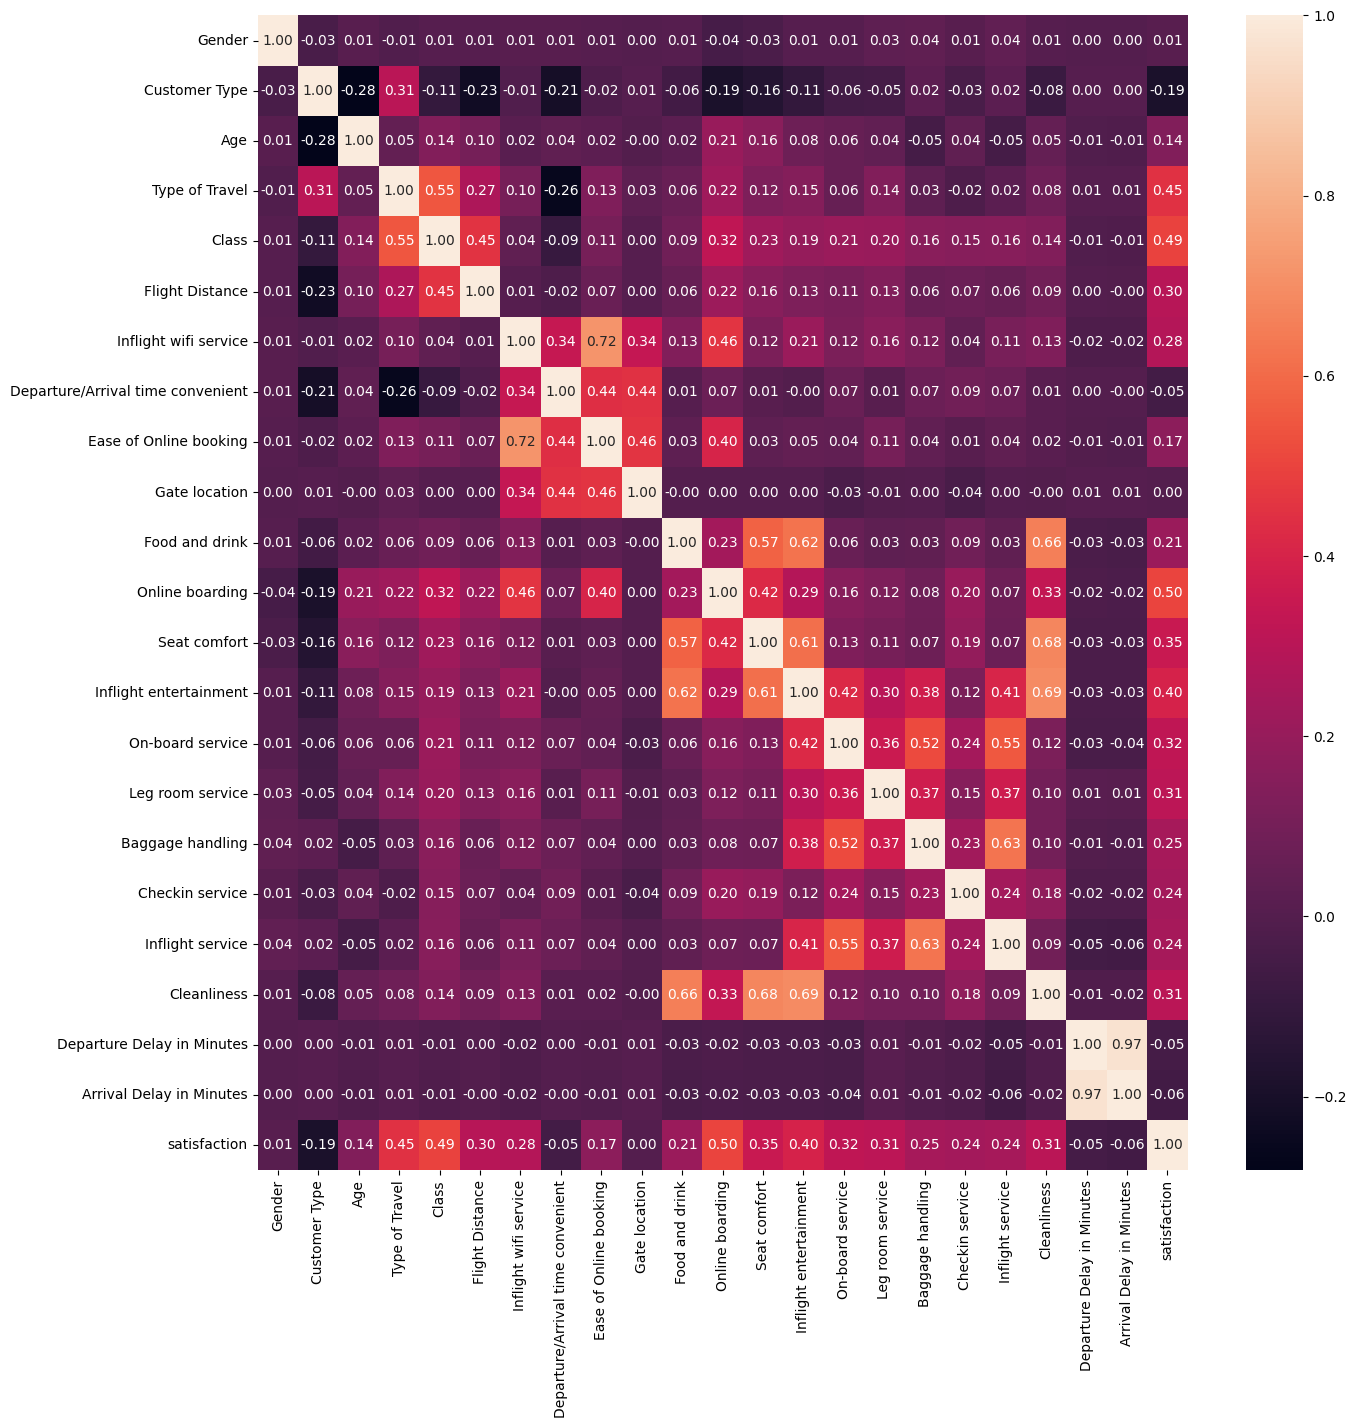

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encod.corr(), annot=True, fmt='.2f')

# Modelos de Classificação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

## KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encod[['Type of Travel','Online boarding']],
                                                    df_encod['satisfaction'],
                                                    test_size=0.2, 
                                                    random_state=1)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acuracia = classifier.score(X_test, y_test)
acuracia

0.8525507987837251

### Validação Cruzada

In [ ]:
X = df_encod[['Type of Travel','Online boarding']]
y = df_encod['satisfaction']

kf_knn = KFold(n_splits = 10, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

scores_knn = cross_val_score(knn, X, y, cv=kf_knn)
score_medio = scores_knn.mean()
score_medio

0.8260319361188172

### Matriz de Confusão

Text(0.5, 1.0, 'Matriz de confusão')

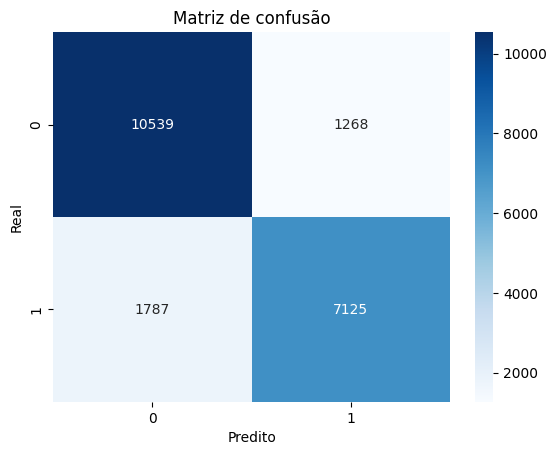

In [ ]:
conf_mat_knn= confusion_matrix(y_test, y_pred)
a = sns.heatmap(conf_mat_knn, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predito')
plt.ylabel('Real');
plt.title('Matriz de confusão')

0: Não satisfeito

1: Satisfeito